In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.integrate import odeint
from scipy.misc import derivative
from ipywidgets import interactive, fixed

# Ecology and Evolution (ICTP) Interactive Lecture Notes
Lecturer: Jacopo Grilli

Authors:
- Ken Tanaka
## Notation
- $D_t f(x) \equiv \frac{d}{dt}f(x)$
- $\partial_t f(x) \equiv \frac{\partial}{\partial t}f(x)$
- $\quad\Rightarrow\quad\equiv$ "Implies"
## Non Linear Dynamics
***
### One Dimension
***
We define a Population function $$n: \mathbb{R}\mapsto\mathbb{R}$$

Assumptions:
- Time is Continuous
- No explicit Time dependence
- $n(t)$ is Continious
- No limited space
- No intraspecific variations (i.e. No Evolution)

The simplest case to study the growth of the population in time, is to define a
Growth function (g) as a function of the Population function.

The system evolves in time through the Ordinary Diferential Equation (ODE):
$$D_tn(t) = g(n(t))n(t)$$
#### Constant Growth
By a constant growth rate $(r)$, we can easily solve the ODE and realize the
Population function grows in an exponential fashion:
$$g(n(t)) = r,\quad D_tn(t) = g(n(t))n(t)\quad\Rightarrow\quad n(t) = e^{rt}$$
#### Logistic Growth
We now proceed to define the Carrying Capacity $(k)$
$$g(n(t)) = r\left(1-\frac{n(t)}{k}\right),\quad D_tn(t) = g(n(t))n(t)\quad\Rightarrow\quad n(t) = e^{rt}$$
In order to solve this equation, we can first simplify the equation by defining
a new set of "dimensionless" variables for $n$ and $t$ as $u$ and $\tau$,
respectively
$$u\equiv \frac{n(t)}{k},\quad \tau\equiv rt\Rightarrow$$
$$D_\tau u(\tau) = (D_t u)(D_\tau t) = \left(\frac{D_t n(t)}{k}\right)\left(\frac{1}{r}\right)=u(\tau)(1-u(\tau))$$
We can solve this simple differential equation and establishing the initial condition at $u(\tau = 0) = u_0$.
$$\begin{aligned}\int_{u_0}^{u(\tau)}\frac{dz}{z(1 - z)} =& \int_0^\tau dT\\\int_{u_0}^{u(\tau)}\left(\frac{1}{z}+\frac{1}{1 - z}\right)dz =& \tau\end{aligned}$$
$$\Rightarrow u(\tau) = \frac{u_0}{u_0 + (1 - u_0)e^{-\tau}}$$
$$\Rightarrow n(t) = \frac{kn_0}{n_0+(k-n_0)e^{-rt}}$$
By analyzing the obtained result we are able to apreciate the following statements
$$\begin{aligned}k >> n_0 :&\quad n(t)\sim n_0e^{rt}\\t\rightarrow\infty\quad\&\quad rt>>1 :&\quad n(t)\sim k\end{aligned}$$
The following code plots the 2 cases through an interactive initial condition ($n(0)$), growth rate ($r$) and carrying capacity ($k$)


#### Budworm Project

In [3]:


G = lambda u, r, q: r*(1 - u/q)
H = lambda u: np.exp(-u)
F = lambda u, r, q: u*(G(u, r, q) - H(u))
ulims = [0, 30]; tlims = [0, 10]
t_arr = np.linspace(*tlims, int(1e2)) # arbitrary tau array
u_arr = np.linspace(*ulims, int(1e3)) # arbitrary u array

rlims = (0.1, 1.5, 0.01)
qlims = (0.5,25, 0.1)

def Budworm_Population_fixed_points(r, q, plot=True):
  """
  Solves for the fixed points of the budworm population given parameters r and q
  """
  g = G(u_arr, r, q)
  h = H(u_arr)
  i_fpts = np.argwhere(np.diff(np.sign(g - h))).flatten() # Indices of fixed
                                                          # points

  # If we want to plot G(u) and H(u) over u
  if plot:
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    fig.tight_layout(pad=5.0)

    plt.xlabel("$u$", size=13)
    plt.ylabel(r"$f(u, r, q)$", size=13)
    plt.plot(u_arr, g, color="midnightblue",
             label="$G(u) = r(1 - \\frac{u}{q})$")
    plt.plot(u_arr, h, color="black", label="$H(u) = \\frac{1}{1+u^2}$")
    plt.plot(u_arr[i_fpts], h[i_fpts], "o", color="firebrick")
    plt.xlim(*ulims)
    plt.ylim(0)
    plt.legend(ncol=2)

    axin = ax.inset_axes([0.35, 0.4, 0.6, 0.4])
    axin.plot(u_arr, g - h, color="black")
    axin.plot(u_arr[i_fpts], g[i_fpts] - h[i_fpts], "o", color="firebrick")
    axin.hlines(0, *ulims, ls="--", colors="black")
    axin.set_ylim(-0.5, 0.5)
    axin.set_yticks(np.arange(-0.5, 1, 0.5))
    axin.set_xlim(0, ulims[-1]//2)
    axin.set_ylabel("$(1/u)du(t)/dt$", size=13)
    axin.set_xlabel("$u(t)$", size=13)

  u_fpts = u_arr[i_fpts] # fixed points
  return u_fpts

plotted = interactive(Budworm_Population_fixed_points,
                      r=rlims, q=qlims, plot=fixed(True))
plotted

interactive(children=(FloatSlider(value=0.8, description='r', max=1.5, min=0.1, step=0.01), FloatSlider(value=…

$$D_tn(t) = rn(t)\left(1-\frac{n(t)}{k}\right) - \frac{n^2(t)}{1 + n^2(t)}$$

In [4]:
def Budworm_fixed_point_stability(u_fpt, r, q):
  """Checks the stability (stable, unstable, or bistable) of a fixed point."""

  der = derivative(F, u_fpt, dx=1e-6, args=(t_arr, r, q))
  # Labels the fixed points with its corresponding stability
  err = 0.01  # Tolerance value; when |x| < 0.01, the computer interprets this
              # as zero.
  if der > err:
    return "unstable"
  elif der < -err:
    return "stable"
  else:
    return "bistable"

In [7]:
def plot_Budworm_Population(r, q, u0=1):
  """ Solves the du/d(tau) ODE to get u(tau) """
  u_tau = odeint(F, u0, args=(r, q)).T[0]
  du_tau = F(u_tau, r, q)

  # Plotting u vs. tau (and the phase space plot du/d(tau) vs. u) given an
  # initial u0
  fig = plt.figure(figsize=(14, 5))
  fig.tight_layout(pad=5.0)
  plt.suptitle(f"$u(0) = {u0}, ~~ r = {r:.2f}, ~~ q = {q:.2f}$")

  plt.subplot(121)
  plt.xlabel("$t$")
  plt.ylabel("$u(t)$")
  plt.plot(t_arr, u_tau, color="black")
  plt.ylim(0, 1.1*np.max(u_tau))
  plt.xlim(0, np.max(t_arr))

  plt.subplot(122)
  plt.xlabel("$u(t)$")
  plt.ylabel("$du/dt$")
  plt.plot(u_tau, du_tau, "->", color="black")
  plt.xlim(0, 1.1*np.max(u_tau))
  plt.grid()

plotted = interactive(plot_Budworm_Population,
                      u0=(*ulims, 0.5), r=rlims, q=qlims)
plotted

interactive(children=(FloatSlider(value=0.8, description='r', max=1.5, min=0.1, step=0.01), FloatSlider(value=…

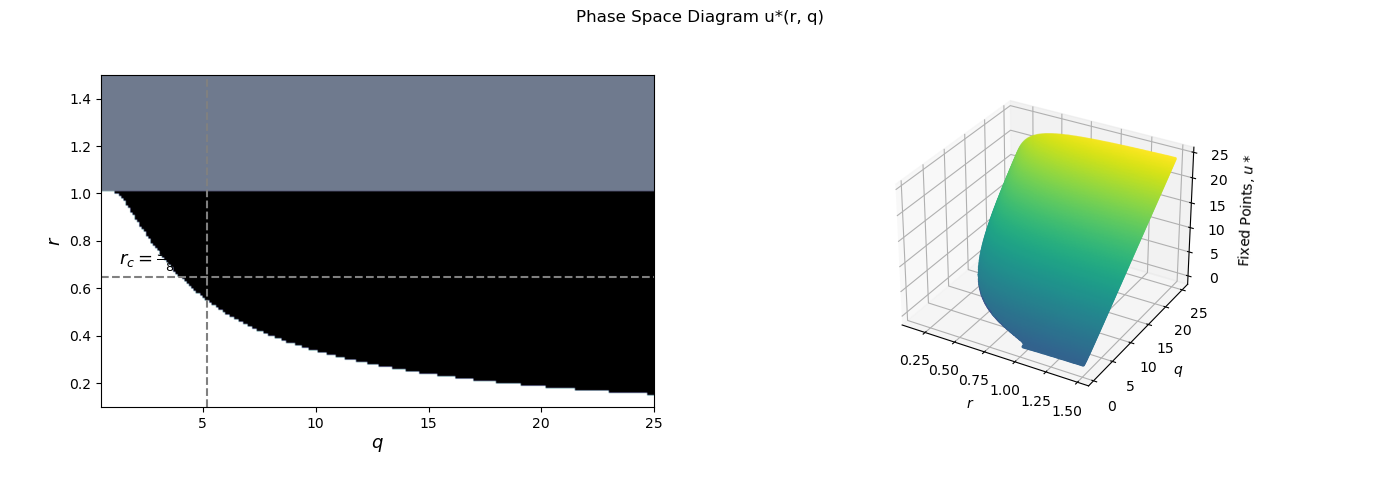

In [5]:
%matplotlib widget
def r_q_phase_space():
  r_arr, q_arr = np.arange(*rlims), np.arange(*qlims)
  rq_s = np.zeros([len(r_arr), len(q_arr)])

  fig, ax = plt.subplots(1, 2, figsize=(14, 5))
  fig.tight_layout(pad=5.0)
  plt.suptitle(f"Phase Space Diagram u*(r, q)")

  # Saves a table of the fixed points and their stabilities for each r and q
  # parameter combination
  with open("fp.dat", "w") as fp:
    for i, r in enumerate(r_arr):
      for j, q in enumerate(q_arr):
        fpts = Budworm_Population_fixed_points(r, q, plot=False)
        rq_s[i, j] = len(fpts)  # number of fixed points
        for fpt in fpts: 
          stability = Budworm_fixed_point_stability(fpt, r, q)
          fp.write(f"{r:.4f}\t{q:.4f}\t{fpt}\t{stability}\n")

  # Plots the phase map
  plt.subplot(121)
  plt.xlabel("$q$", size=13)
  plt.ylabel("$r$", size=13)
  plt.vlines(3*np.sqrt(3), rlims[0], rlims[1], colors="grey",
             linestyles="dashed")
  plt.hlines(3*np.sqrt(3)/8, qlims[0], qlims[1], colors="grey",
             linestyles="dashed")
  plt.text(1.3, 0.7, "$r_c = \\frac{3\\sqrt{3}}{8}$", fontsize=13)
  plt.text(6, 0.7, "$q_c = 3\\sqrt{3}$", fontsize=13)
  plt.imshow(rq_s, origin="lower", cmap="bone_r", aspect="auto",
             extent=[qlims[0], qlims[1], rlims[0], rlims[1]])

  # Plots the 3D Phase Space
  ax[1].remove()
  ax[1] = fig.add_subplot(122, projection='3d')
  ax[1].set_xlabel("$r$")
  ax[1].set_ylabel("$q$")
  ax[1].set_zlabel("Fixed Points, $u*$")
  
  with open("fp.dat", "r") as fr:
    x, y, u_fpts, st = np.asarray([line[:-1].split("\t")
                                   for line in fr.readlines()]).T
    x, y, u_fpts = x.astype(float), y.astype(float), u_fpts.astype(float)

    i_unstable = np.argwhere(st == "unstable").flatten() 
    k = np.zeros(len(u_fpts))
    k[i_unstable] = 1

    ax[1].scatter(x, y, u_fpts, s=2, c=u_fpts*(np.power(-1, k)))
  plt.show()

r_q_phase_space()

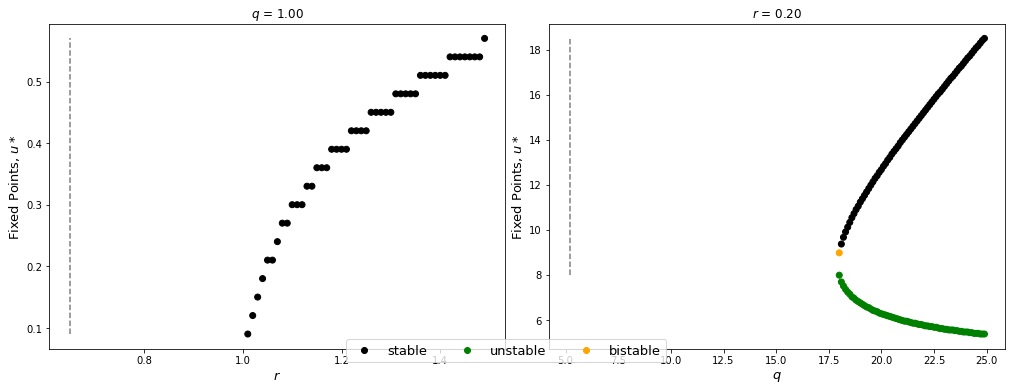

In [4]:
def fpoints_vs_r_q(r, q):
  r_fpts, rs, q_fpts, qs = [], [], [], []
  fig = plt.figure(figsize=(14, 5))
  colors_rq = {"stable" : "black",
               "unstable" : "green",
               "bistable" : "orange"}
  cmap = colors.ListedColormap(colors_rq.values())
  try:
    with open("fp.dat", "r") as fr:
      xyz = np.asarray([line[:-1].split("\t") for line in fr.readlines()])
      rs, r_fpts, rfpt_st = xyz[np.ix_(xyz[:, 1].astype(float) == round(q, 3),
                                       (0, 2, 3))].T
      rs, r_fpts = rs.astype(float), r_fpts.astype(float)
      c_r = [colors_rq[st] for st in rfpt_st]

      ax = plt.subplot(121)
      plt.title(f"$q$ = {q:.2f}")
      plt.scatter(rs, r_fpts, c=c_r, cmap=cmap)
      plt.vlines(3*np.sqrt(3)/8, r_fpts[0], r_fpts[-1], colors="grey",
                 linestyles="dashed")
      plt.xlabel("$r$", size=13)
      plt.ylabel("Fixed Points, $u*$", size=13)
      box = ax.get_position()
      ax.set_position([box.x0, box.y0 + box.height*0.2, box.width,
                       box.height*0.8])

      qs, q_fpts, qfpt_st = xyz[np.ix_(xyz[:, 0].astype(float) == round(r, 3),
                                       (1, 2, 3))].T
      qs, q_fpts = qs.astype(float), q_fpts.astype(float)
      c_q = [colors_rq[st] for st in qfpt_st]

      ax = plt.subplot(122)
      plt.title(f"$r$ = {r:.2f}")
      plt.scatter(qs, q_fpts, c=c_q, cmap=cmap)
      plt.xlabel("$q$", size=13)
      plt.vlines(3*np.sqrt(3), q_fpts[0], q_fpts[-1], colors="grey",
                 linestyles="dashed")
      plt.ylabel("Fixed Points, $u*$", size=13)
      markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='')
                 for color in colors_rq.values()]
      box = ax.get_position()
      ax.set_position([box.x0, box.y0 + box.height * 0.1,
                       box.width, box.height * 0.9])
      fig.legend(markers, colors_rq.keys(), fontsize=13, ncol=3,
                 bbox_to_anchor=(0.5, -0.02), loc='lower center')
      fig.tight_layout(pad=0.5)
      plt.show()

  except Exception as e:
    print("Manual", e)
    r_fpts, rs, q_fpts, qs = [], [], [], []
    fig = plt.figure(figsize=(14, 5))
    fig.tight_layout(pad=5.0)
    for r_x in np.arange(*rlims): 
      fpt = Budworm_Population_fixed_points(r_x, q, plot=False)
      r_fpts += list(fpt)
      rs += [r_x]*len(fpt)

    for q_x in np.arange(*qlims): 
      fpt = Budworm_Population_fixed_points(r, q_x, plot=False)
      q_fpts += list(fpt)
      qs += [q_x]*len(fpt)

    plt.subplot(121)
    plt.title(f"$q$ = {q:.2f}")
    plt.plot(rs, r_fpts, "o", color="black")
    plt.vlines(3*np.sqrt(3)/8, r_fpts[0], r_fpts[-1], colors="grey",
              linestyles="dashed")
    plt.xlabel("$r$", size=13)
    plt.ylabel("Fixed Points, $u*$", size=13)

    plt.subplot(122)
    plt.title(f"$r$ = {r:.2f}")
    plt.plot(qs, q_fpts, "o", color="black")
    plt.xlabel("$q$", size=13)
    plt.vlines(3*np.sqrt(3), q_fpts[0], q_fpts[-1], colors="grey",
              linestyles="dashed")
    plt.ylabel("Fixed Points, $u*$", size=13)
    plt.show()

fpoints_vs_r_q(0.2, 1)